In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('titanic_toy.csv')

In [13]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [15]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [16]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [17]:
x.head(5)

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [19]:
mean_age = X_train['Age'].mean()
mean_fare = X_train['Fare'].mean()

median_age = X_train['Age'].median()
median_fare = X_train['Fare'].median()

In [20]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [21]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
378,20.0,NaN,0,20.000000,20.0,31.874555,14.4583
46,NaN,15.500,1,30.166232,29.0,15.500000,15.5000
746,16.0,20.250,2,16.000000,16.0,20.250000,20.2500
311,18.0,262.375,4,18.000000,18.0,262.375000,262.3750
412,33.0,90.000,1,33.000000,33.0,90.000000,90.0000


In [22]:
print('age')
print('original',X_train['Age'].var())
print('mean ',X_train['Age_mean'].var())
print('median ',X_train['Age_median'].var())

print('Fare')
print('original',X_train['Fare'].var())
print('mean ',X_train['Fare_mean'].var())
print('median ',X_train['Fare_median'].var())

age
original 220.7125508594779
mean  176.01127473603933
median  176.23102602680194
Fare
original 2179.2211148474075
mean  2065.815796634533
median  2080.780407755895


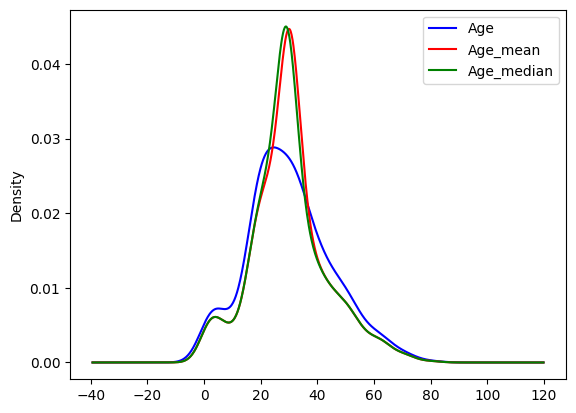

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax , color='blue')
X_train['Age_mean'].plot(kind='kde',ax=ax , color='red')
X_train['Age_median'].plot(kind='kde',ax=ax , color='green')

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels , loc='best')

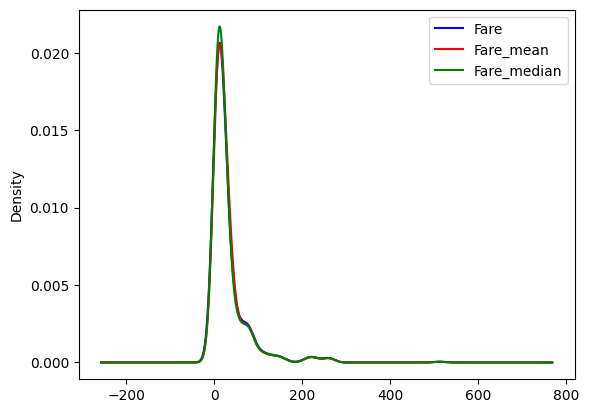

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax , color='blue')
X_train['Fare_mean'].plot(kind='kde',ax=ax , color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax , color='green')

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels , loc='best')

In [25]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,220.712551,80.290359,-5.974166,220.712551,220.712551,75.785411,75.994880
Fare,80.290359,2179.221115,17.962001,63.754196,65.792314,2179.221115,2179.221115
Family,-5.974166,17.962001,2.265902,-4.764208,-4.722243,17.027269,16.954058
Age_mean,220.712551,63.754196,-4.764208,176.011275,176.011275,60.436467,60.603512
Age_median,220.712551,65.792314,-4.722243,176.011275,176.231026,62.368522,62.464631
Fare_mean,75.785411,2179.221115,17.027269,60.436467,62.368522,2065.815797,2065.815797
Fare_median,75.994880,2179.221115,16.954058,60.603512,62.464631,2065.815797,2080.780408


<Axes: >

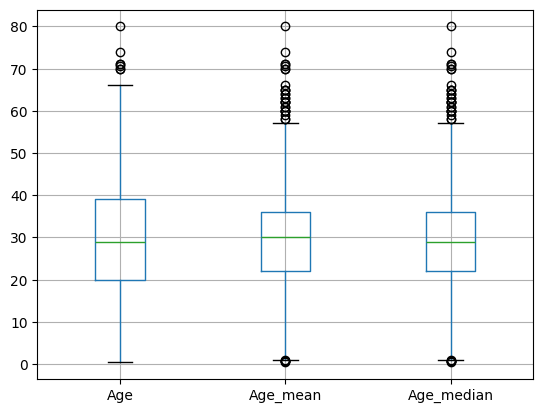

In [26]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

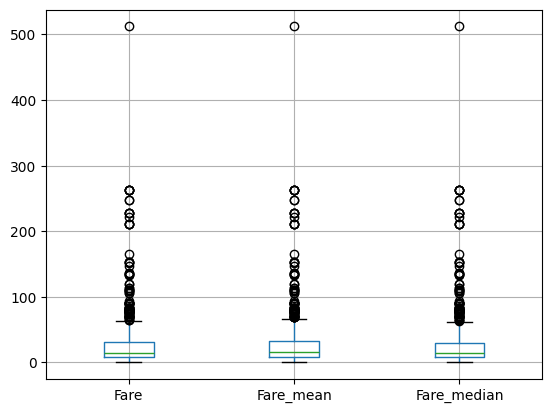

In [27]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [30]:
imp1 = SimpleImputer(strategy='median')
imp2 = SimpleImputer(strategy='mean')

In [32]:
trf = ColumnTransformer([
    ('imputer1',imp1,['Age']),
    ('imputer2',imp2,['Fare'])
],remainder='passthrough')

In [33]:
trf.fit(X_train)

/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_['imputer1'].statistics_

array([29.])

In [35]:
trf.named_transformers_['imputer2'].statistics_

array([31.87455467])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)